## **TF-IDF_SVM_NB**

In [ ]:
## importing libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
## importing dataset
df = pd.read_csv("/content/drive/MyDrive/NLP_Project/Vaccine_Sentiments.csv", quotechar='"', delimiter=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
len(df)

159306

In [ ]:
x = df.loc[0,'clean_text']

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=3000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
features = vectorizer.fit_transform(df['clean_text'].values).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, df['sentiment'].values, test_size=0.25, random_state=42)

In [ ]:
del features

In [ ]:
result_accuracies = []

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
t0 = time.time()
gnb_clf.fit(X_train, y_train)
t1 = time.time()
gnb_pred = gnb_clf.predict(X_test)
t2 = time.time()
time_to_train = t1-t0
time_to_predict = t2-t1     ## results
print("Time to train: %fs; Time for Prediction: %fs" % (time_to_train, time_to_predict))

Time to train: 4.998668s; Time for Prediction: 2.279715s


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, gnb_pred))
print()
gnb_result = accuracy_score(y_test, gnb_pred)
print(gnb_result)
result_accuracies.append(gnb_result)
print()
print(classification_report(y_test, gnb_pred))

[[ 4912  2107   575]
 [  657 13233   219]
 [ 3890  3538 10696]]

0.7241569789338891

              precision    recall  f1-score   support

    Negative       0.52      0.65      0.58      7594
     Neutral       0.70      0.94      0.80     14109
    Positive       0.93      0.59      0.72     18124

    accuracy                           0.72     39827
   macro avg       0.72      0.72      0.70     39827
weighted avg       0.77      0.72      0.72     39827



In [ ]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
t0 = time.time()
lsvc.fit(X_train, y_train)
t1 = time.time()
lsvc_pred = lsvc.predict(X_test)
t2 = time.time()
time_to_train = t1-t0
time_to_predict = t2-t1     ## results
print("Time to train: %fs; Time for Prediction: %fs" % (time_to_train, time_to_predict))

Time to train: 3.177286s; Time for Prediction: 0.314837s


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, lsvc_pred))
print()
lsvc_result = accuracy_score(y_test, lsvc_pred)
print(lsvc_result)
result_accuracies.append(lsvc_result)
print()
print(classification_report(y_test, lsvc_pred))

[[ 4841  1781   972]
 [  190 13631   288]
 [  576  1326 16222]]

0.8711175835488487

              precision    recall  f1-score   support

    Negative       0.86      0.64      0.73      7594
     Neutral       0.81      0.97      0.88     14109
    Positive       0.93      0.90      0.91     18124

    accuracy                           0.87     39827
   macro avg       0.87      0.83      0.84     39827
weighted avg       0.88      0.87      0.87     39827



## **word2vec_LSTM**

In [ ]:
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from gensim.models import KeyedVectors

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
X_data = df['clean_text'].copy()
X_data = X_data.append(df['clean_text'].copy(), ignore_index=True)

In [ ]:
X_words = [nltk.word_tokenize(tweets) for tweets in X_data]
model = Word2Vec(X_words, min_count =1)
## words = model.wv.key_to_index
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")
model.save("word2vec.model")

In [ ]:
vector = model.wv['vaccine']
print(vector)

[ 8.0637507e-02 -3.0214934e+00  2.3933976e+00 -1.4601897e+00
  8.6977619e-01 -2.8207569e+00 -9.3803543e-01  1.7642550e+00
  9.5016074e-01 -1.4297305e+00 -3.8586283e-01  6.7514920e-01
  1.0042628e+00  2.0258024e+00  4.3067464e-01 -1.8257488e+00
 -2.2346530e+00  3.8641717e+00  1.2886222e-01  1.4043387e+00
 -2.5795922e+00  2.0382875e-01 -6.9075876e-01 -5.4469621e-01
 -7.8550979e-02  2.1015790e+00 -3.5282404e+00 -4.1645865e+00
  1.6817051e+00  8.6928672e-01  7.8335613e-01  1.8988515e+00
  1.0305017e+00 -1.8073686e+00 -2.6870372e+00 -1.5417857e+00
  1.8976196e+00 -1.1788439e+00 -2.8539906e+00 -2.3693559e-03
  2.0444074e+00 -7.5153822e-01  6.0725357e-02  5.6363058e-01
 -4.7281690e+00 -2.5321176e+00 -1.3742599e+00  1.3206245e-01
  9.8439753e-01 -2.9988339e+00 -6.5940905e-01 -9.3663526e-01
  1.4009756e+00  3.1137145e-01 -1.2167155e+00 -1.5427831e+00
 -9.2836994e-01  2.5562606e+00 -6.5576935e-01  4.7180861e-01
  1.6258188e+00 -2.9415011e+00  1.6978482e+00 -8.5641474e-01
  1.2214072e+00 -2.53057

In [ ]:
similar = model.wv.most_similar('india')
print(similar)

[('pakistan', 0.7315430641174316), ('china', 0.6621567010879517), ('nepal', 0.6597976684570312), ('indian', 0.6488049030303955), ('russia', 0.6469321846961975), ('brazil', 0.639851450920105), ('pune', 0.6219085454940796), ('canada', 0.611748218536377), ('israel', 0.5943200588226318), ('europe', 0.5913971662521362)]


In [ ]:
## voc_size = len(words)
## print(voc_size)

In [ ]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
X_full = df['clean_text'].copy()
Y_full = df['sentiment'].copy()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_full)
sequences = tokenizer.texts_to_sequences(X_full)

In [ ]:
max_length = 0
for tweet_number in range(len(sequences)):
    numberofwords = len(sequences[tweet_number])
    if (numberofwords) > (max_length):
        max_length = numberofwords
print(max_length)

68


In [ ]:
# padding the sequence for shorter tweets

from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

data = pad_sequences(sequences, maxlen = max_length)
print('shape of X:',data.shape)
print('shape of y:',Y_full.shape)

shape of X: (206906, 68)
shape of y: (206906,)


In [ ]:
#load my word embeddings

wordembeddings = KeyedVectors.load("word2vec.wordvectors", mmap='r')

In [ ]:
unique_words = len(tokenizer.word_index)
total_words = unique_words + 1
skipped_words = 0
embedding_dim = 100
embedding_matrix = np.zeros((total_words, embedding_dim))

for word, index in tokenizer.word_index.items():
    try:
        embedding_vector = wordembeddings[word]
    except:
        skipped_words = skipped_words + 1
        pass
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
print('Embedding Matrix shape : ', embedding_matrix.shape)

Embedding Matrix shape :  (83297, 100)


In [ ]:
from tensorflow.keras.layers import *
#create the embedding layer
embedding_layer = Embedding(total_words, 
                            embedding_dim, 
                            weights=[embedding_matrix],
                            input_length = max_length,
                            trainable = False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
## splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(data, Y_full, test_size=0.25, random_state=0)

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
tf.keras.backend.clear_session()

## hyper parameters
EPOCHS = 10
BATCH_SIZE = 32
units = 256

model = tf.keras.Sequential([
    embedding_layer,
    L.Bidirectional(L.LSTM(units,return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64, activation="relu"),
    L.Dropout(0.4),
    L.Dense(3)
])

In [ ]:
## compiling model with loss function and optimiser
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 68, 100)           8329700   
_________________________________________________________________
bidirectional (Bidirectional (None, 68, 512)           731136    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [ ]:
checkpoint = ModelCheckpoint("best_model_COVID.hdf5", monitor='loss', verbose=1,
    save_best_only=False, mode='auto', period=1)

In [ ]:
CovidVaccine_model = model.fit(X_train, y_train,epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])

Epoch 1/10
4850/4850 [==============================] - 224s 45ms/step - loss: 0.6884 - accuracy: 0.7064 - val_loss: 0.4234 - val_accuracy: 0.8465

Epoch 00001: saving model to best_model_COVID.hdf5
Epoch 2/10
4850/4850 [==============================] - 219s 45ms/step - loss: 0.4307 - accuracy: 0.8470 - val_loss: 0.3476 - val_accuracy: 0.8796

Epoch 00002: saving model to best_model_COVID.hdf5
Epoch 3/10
4850/4850 [==============================] - 223s 46ms/step - loss: 0.3405 - accuracy: 0.8840 - val_loss: 0.3069 - val_accuracy: 0.8971

Epoch 00003: saving model to best_model_COVID.hdf5
Epoch 4/10
4850/4850 [==============================] - 224s 46ms/step - loss: 0.2939 - accuracy: 0.9023 - val_loss: 0.2876 - val_accuracy: 0.9046

Epoch 00004: saving model to best_model_COVID.hdf5
Epoch 5/10
4850/4850 [==============================] - 223s 46ms/step - loss: 0.2553 - accuracy: 0.9158 - val_loss: 0.2741 - val_accuracy: 0.9123

Epoch 00005: saving model to best_model_COVID.hdf5
Epoch

In [ ]:
pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.2827487289905548
Test Accuracy: 0.9175285696983337


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, pred))
print()
wlstm_result = accuracy_score(y_test, pred)
print(wlstm_result)
result_accuracies.append(wlstm_result)
print()
print(classification_report(y_test, pred, target_names=labels))

[[ 8552   697   830]
 [  761 17372   658]
 [  690   630 21537]]

0.9175285634194907

              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85     10079
     Neutral       0.93      0.92      0.93     18791
    Positive       0.94      0.94      0.94     22857

    accuracy                           0.92     51727
   macro avg       0.91      0.91      0.91     51727
weighted avg       0.92      0.92      0.92     51727



## **Keras_LSTM**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
## importing dataset
df = pd.read_csv("/content/drive/MyDrive/NLP_Project/sentiment_tweets.csv", quotechar='"', delimiter=',')
df.head()

,Unnamed: 0,clean_text,sentiment
0,0,australia to manufacture covid 19 vaccine and ...,Positive
1,1,coronavirusvaccine coronavaccine covidvaccine...,Positive
2,2,deaths due to covid 19 in affected countries\n...,Negative
3,3,stay safe di amp da,Positive
4,4,this is what passes for leadership in our cou...,Neutral


In [ ]:
encoding = {'Negative': 0,
            'Neutral': 1,
            'Positive':2
           }

labels = ['Negative', 'Neutral', 'Positive']
           
df.replace(encoding, inplace=True)
df.head()

,Unnamed: 0,clean_text,sentiment
0,0,australia to manufacture covid 19 vaccine and ...,2
1,1,coronavirusvaccine coronavaccine covidvaccine...,2
2,2,deaths due to covid 19 in affected countries\n...,0
3,3,stay safe di amp da,2
4,4,this is what passes for leadership in our cou...,1


In [ ]:
X_data = df['clean_text'].copy()
y_data = df['sentiment'].copy()

In [ ]:
## tokenise the sentences (keras)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)

X = tokenizer.texts_to_sequences(X_data)

vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("\nExample:\n")
print("Sentence:\n{}".format(X_data[6]))
print("\nAfter tokenizing :\n{}".format(X[6]))

X = pad_sequences(X, padding='post')
print("\nAfter padding :\n{}".format(X[6]))

Vocabulary size: 83297

Example:

Sentence:
 

After tokenizing :
[]

After padding :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
## splitting training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.25, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((155179, 68), (51727, 68), (155179,), (51727,))

In [ ]:
tf.keras.backend.clear_session()

## hyper parameters
EPOCHS = 2
BATCH_SIZE = 32
embedding_dim = 16
units = 256

model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim, input_length=X_train.shape[1]),
    L.Bidirectional(L.LSTM(units,return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64, activation="relu"),
    L.Dropout(0.4),
    L.Dense(3)
])

In [ ]:
## compiling model with loss function and optimiser
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy']
             )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 68, 16)            1332752   
_________________________________________________________________
bidirectional (Bidirectional (None, 68, 512)           559104    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

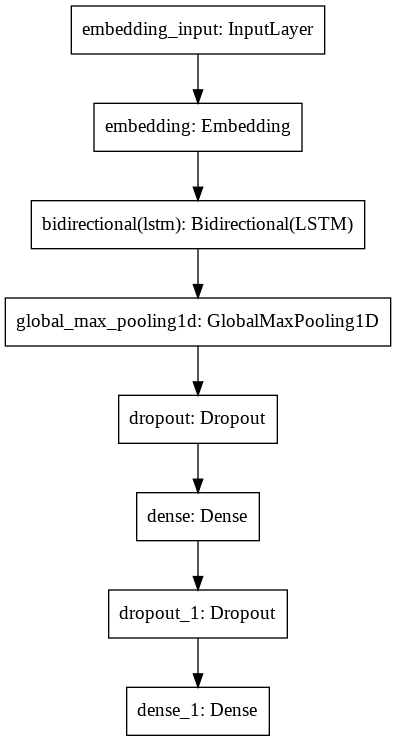

In [ ]:
plot_model(model)

In [ ]:
checkpoint = ModelCheckpoint("best_model_COVID.hdf5", monitor='loss', verbose=1,
    save_best_only=False, mode='auto', period=1)

In [ ]:
CovidVaccine_model = model.fit(X_train, y_train,epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])

Epoch 1/2
4850/4850 [==============================] - 353s 66ms/step - loss: 0.5448 - accuracy: 0.7741 - val_loss: 0.1413 - val_accuracy: 0.9554

Epoch 00001: saving model to best_model_COVID.hdf5
Epoch 2/2
4850/4850 [==============================] - 306s 63ms/step - loss: 0.1131 - accuracy: 0.9640 - val_loss: 0.1193 - val_accuracy: 0.9628

Epoch 00002: saving model to best_model_COVID.hdf5


In [ ]:
lstm_pred = model.predict_classes(X_test)
lstm_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



array([2, 0, 0, ..., 0, 1, 1])

In [ ]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.11934241652488708
Test Accuracy: 0.9628047347068787


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, lstm_pred))
print()
klstm_result = accuracy_score(y_test, lstm_pred)
print(klstm_result)
result_accuracies.append(klstm_result)
print()
print(classification_report(y_test, lstm_pred, target_names=labels))

[[ 9483   116   480]
 [  414 17930   447]
 [  353   114 22390]]

0.9628047248052275

              precision    recall  f1-score   support

    Negative       0.93      0.94      0.93     10079
     Neutral       0.99      0.95      0.97     18791
    Positive       0.96      0.98      0.97     22857

    accuracy                           0.96     51727
   macro avg       0.96      0.96      0.96     51727
weighted avg       0.96      0.96      0.96     51727



In [ ]:
# conf = confusion_matrix(y_test, pred)

# cm = pd.DataFrame(
#     conf, index = [i for i in labels],
#     columns = [i for i in labels]
# )

# 
# plt.figure(figsize = (12,7))
# sns.heatmap(cm, annot=True, fmt="d")
# plt.show()

## **Comparision Visualization**

In [ ]:
names = ['GNB' , 'CNB', 'SVC', 'word2vec_LSTM',  'keras_LSTM']
result_accuracies = [0.75620082355443, 0.7907282463703675, 0.8708991435807218, 0.9175285634194907, 0.9628047248052275]

<BarContainer object of 5 artists>

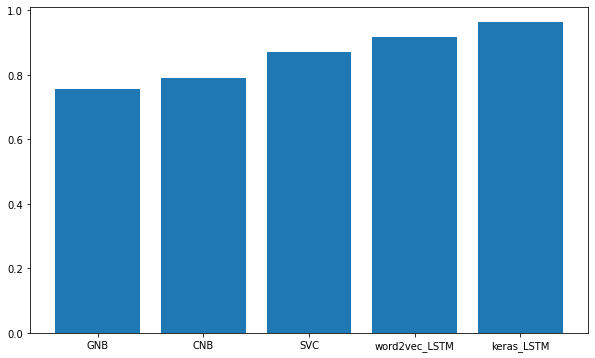

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.bar(names, result_accuracies)

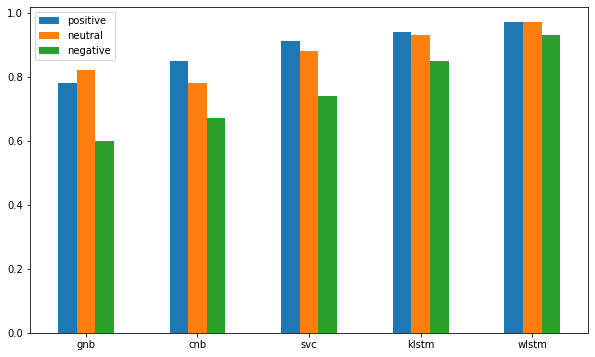

In [ ]:
pos_f1 = [0.78, 0.85, 0.91, 0.94, 0.97]
neg_f1 = [0.6, 0.67,  0.74, 0.85, 0.93]
neu_f1 = [0.82, 0.78, 0.88, 0.93, 0.97]

index = ['gnb', 'cnb', 'svc', 'klstm', 'wlstm']
df = pd.DataFrame({'positive': pos_f1,
                   'neutral': neu_f1,
                   'negative': neg_f1}, index=index)
ax = df.plot.bar(figsize=(10, 6), rot=0)